In [6]:
from colmap_depth_im_render import ColmapScene
import bayes3d as b
import matplotlib.pyplot as plt
import jax.numpy as jnp

In [2]:
cs = ColmapScene("ku_scene_vids_linear_54/frames1/dense/0/sparse/cameras.txt", "ku_scene_vids_linear_54/frames1/dense/0/sparse/images.txt", "ku_scene_vids_linear_54/frames1/dense/meshed_delaunay.ply")

[E rasterize_gl.cpp:121] OpenGL version reported as 4.6


Increasing frame buffer size to (width, height, depth) = (640, 480, 1024)


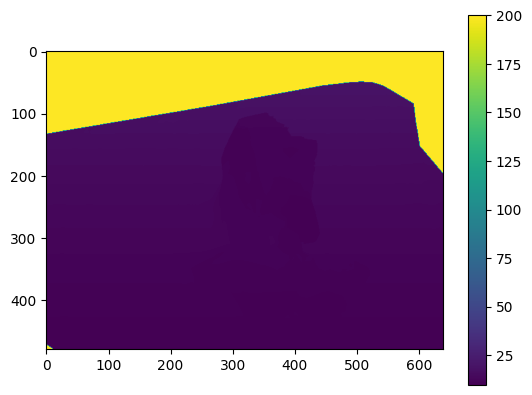

In [8]:
renderer_intrinsics, scene_mesh_file, transform = cs.get_depth_render_args(camera_num = 0, scaling_factor = 1)

b.setup_renderer(renderer_intrinsics)
b.RENDERER.add_mesh_from_file(scene_mesh_file, center_mesh=False)
im_out = b.RENDERER.render(transform[None,...], jnp.array([0]))
depth_im = im_out[:,:,2]

plt.imshow(depth_im)
plt.colorbar()

In [ ]:
# recreate all 20 frames?

In [9]:
jnp.save('depth_im_colmap_frames1',depth_im)

In [10]:
depth_im_pc = b.unproject_depth(depth_im,renderer_intrinsics)

In [15]:
b.setup_visualizer()
b.show_cloud('123',depth_im_pc.reshape(-1,3))

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7006/static/


In [16]:
jnp.save('depth_im_pc_colmap_frames1',depth_im_pc)